# Market segmentation example

## Problem- 
### We have given ratings submitted by our customers and ratings of their loyalty based on their purchase,
### now we have to seperate them in different groups to make marketing strategy from them.

## Import relevent libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [2]:
raw_data=pd.read_csv(r"datasets/7.Market Segmentation.csv")

In [3]:
raw_data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the data

Text(0, 0.5, 'Loyality')

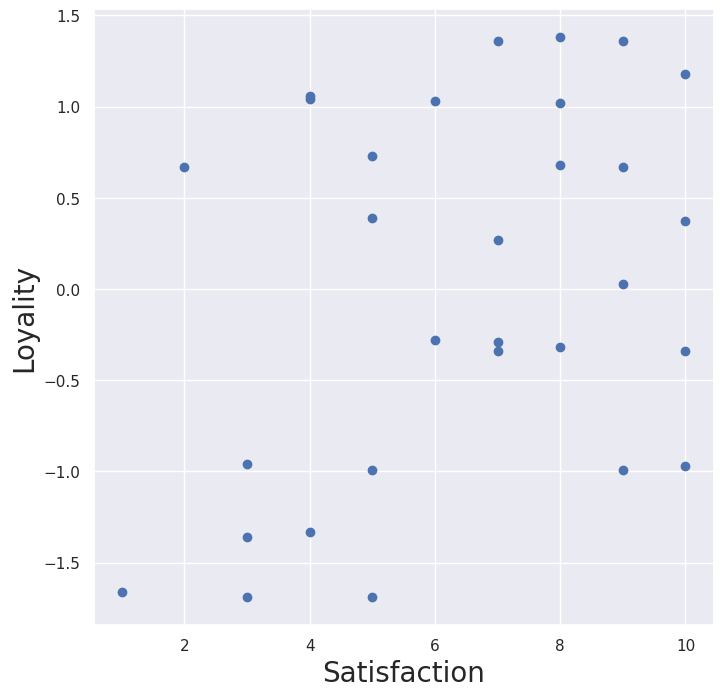

In [4]:
plt.figure(figsize=(8,8))
plt.scatter(raw_data['Satisfaction'],raw_data['Loyalty'])
plt.xlabel('Satisfaction',fontsize=20)
plt.ylabel('Loyality',fontsize=20)

## Select the features

In [5]:
x=raw_data.copy()

## Clustering

In [6]:
kmeans=KMeans()
kmeans.fit(x)

/home/atul/Public/Data_science/Git_repo_1/venv_git_repo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [7]:
clusters=x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

/home/atul/Public/Data_science/Git_repo_1/venv_git_repo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Loyalty')

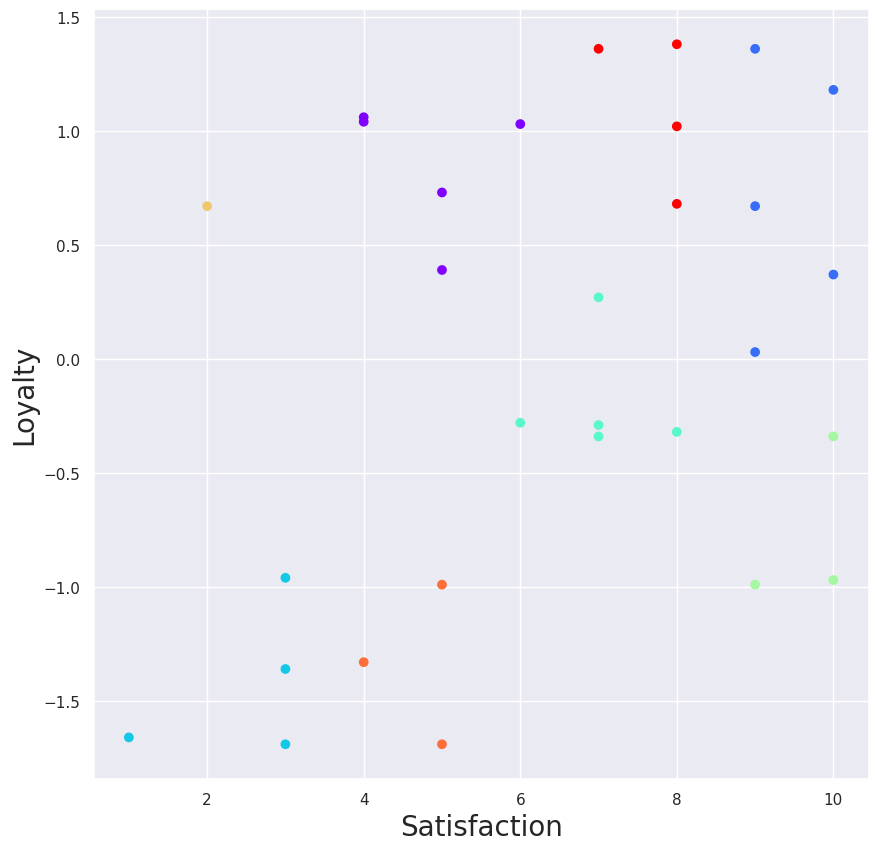

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction',fontsize=20)
plt.ylabel('Loyalty',fontsize=20)

## Standardize the variables

In [9]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [10]:
wcss=[]

for i in range(1,10):
    kmeans=KMeans(i, n_init='auto')
    kmeans.fit(x_scaled)
    inert=kmeans.inertia_
    wcss.append(inert)
wcss

[59.99999999999999,
 32.43692292542639,
 18.058485014940032,
 16.689269780420965,
 9.023976139083018,
 6.666688373390819,
 5.6557197133368975,
 4.752705412932378,
 4.076155915920553]

Text(0, 0.5, 'WCSS')

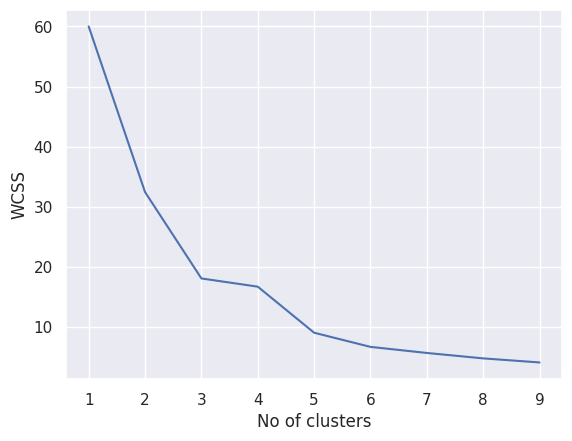

In [11]:
plt.plot(range(1,10),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')

- From graph we can clearly see the 4 or 5 nos of cluster are best choice

## Plotting Cluster Chart with 4 clusters

In [12]:
kmeans_4=KMeans(4, n_init="auto")
kmeans_4.fit(x_scaled)
clusters_new=x.copy()
clusters_new['clusters_pred']=kmeans_4.fit_predict(x_scaled)

In [13]:
clusters_new

,Satisfaction,Loyalty,clusters_pred
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,3
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,2
9,8,0.68,2


Text(0, 0.5, 'Loyalty')

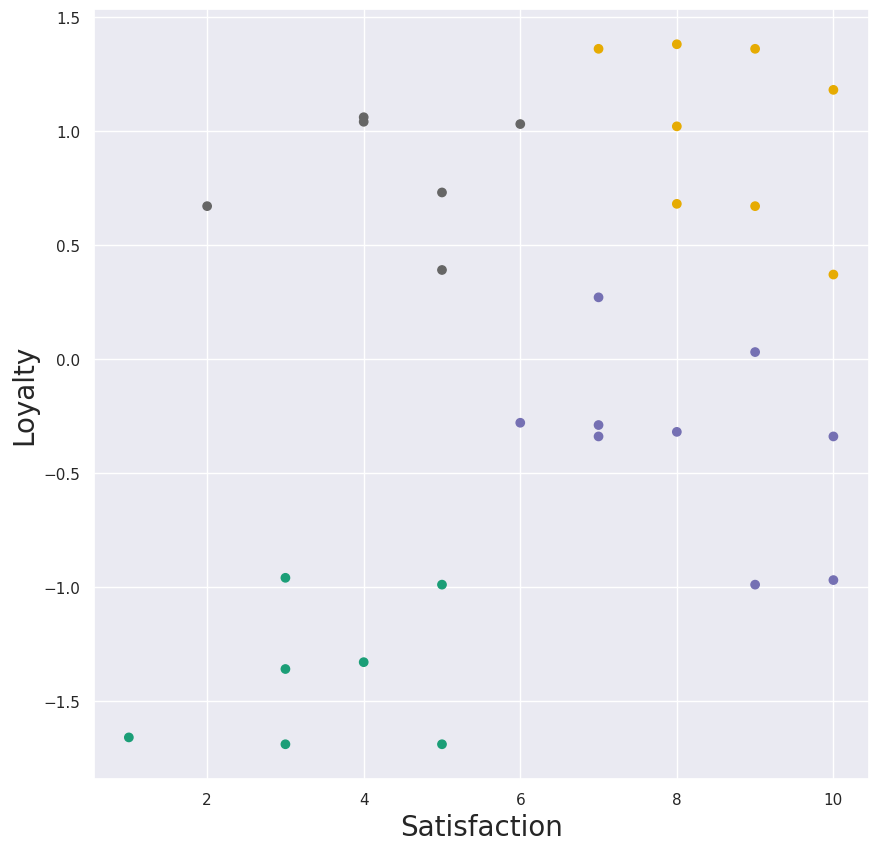

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['clusters_pred'],cmap='Dark2')
plt.xlabel('Satisfaction',fontsize=20)
plt.ylabel('Loyalty',fontsize=20)

## Plotting Graph with 5 Clusters

In [15]:
kmeans_5=KMeans(5, n_init='auto')
kmeans_5.fit(x_scaled)
clusters_new=x.copy()
clusters_new['clusters_pred']=kmeans_5.fit_predict(x_scaled)

Text(0, 0.5, 'Loyalty')

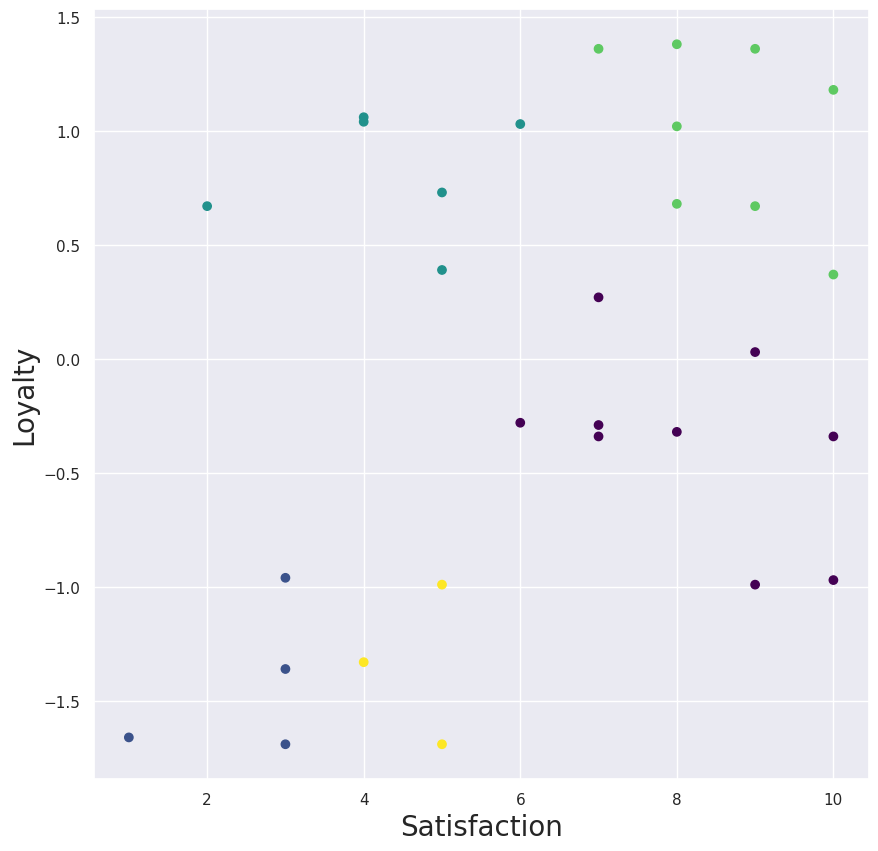

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['clusters_pred'],cmap='viridis')
plt.xlabel('Satisfaction',fontsize=20)
plt.ylabel('Loyalty',fontsize=20)

## From analyzing both graph we can choose one which may be more useful for our needs
#### In this case I would choose 4 clusters and divide customers in 4 Groups \n
#### 1.Fans- High satisfaction, high loyalty
#### 2.Roamers- High satisfaction, low loyalty
#### 3.Supporters- Low satisfaction, high loyalty
#### 4.Alieanated- Low satisfaction, low loyalty